<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/_final_latest_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     / 43.5MB 2.5MB/s
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 604kB 26.0MB/s 
     |████████████████████████████████| 3.1MB 46.1MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 296kB 50.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=3386d076dd1705acb18ec6d811a1e06b63617133460c4feffa32fd6f254925b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mdzdej8/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=b6fd2ca42d033e4ed5150ca5a0efb276cd91549b79cf4a31c7410c723578fdd1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully unin

In [1]:
!pip install NBprocessing

In [2]:
from NBprocessing import NBcategorical
from NBprocessing import NBcontinuous
from NBprocessing import NBplot
from NBprocessing import NBgeneral

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [22]:
path = '/gdrive/My Drive/'

In [23]:
data = pd.read_csv(path + 'Copy of train.psv', sep='|')

In [28]:
sample_excel=data.sample(5)
sample_excel

HR  O2Sat  Temp     SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
589934   99.0  100.0   NaN  104.75  ...    NaN        -0.03       4            0
890071  109.0   95.0   NaN  128.00  ...    0.0       -84.93      48            0
472201   83.0   93.0   NaN   96.00  ...    NaN       -10.39      20            0
498376    NaN    NaN   NaN     NaN  ...    NaN        -0.01       1            0
831537   90.0    NaN   NaN  140.00  ...    0.0       -11.98      32            0

[5 rows x 41 columns]

In [29]:
sample_excel.to_excel(path + 'sample_excel.xlsx')

In [30]:
data.shape

(1167202, 41)

In [31]:
missing = NBgeneral.missing_values(data)
missing

#Missing_values  %Missing_values
Bilirubin_direct          1165131             99.8
Fibrinogen                1159063             99.3
TroponinI                 1159014             99.3
Bilirubin_total           1150776             98.6
Alkalinephos              1148956             98.4
AST                       1148690             98.4
EtCO2                     1139801             97.7
Lactate                   1132987             97.1
PTT                       1125284             96.4
SaO2                      1120935             96.0
Phosphate                 1116417             95.6
HCO3                      1102792             94.5
Calcium                   1102473             94.5
Chloride                  1099107             94.2
Platelets                 1095759             93.9
Creatinine                1094076             93.7
PaCO2                     1089567             93.3
WBC                       1088216             93.2
Magnesium                 1087792             93.2
BaseExcess                1083871             92.9
BUN                       1082105             92.7
Hgb                       1075317             92.1
pH                        1068276             91.5
Potassium                 1052545             90.2
Hct                       1052275             90.2
FiO2                      1046735             89.7
Glucose                    987695             84.6
Temp                       772577             66.2
Unit2                      495981             42.5
Unit1                      495981             42.5
DBP                        434103             37.2
SBP                        173917             14.9
Resp                       157166             13.5
O2Sat                      149329             12.8
MAP                        137670             11.8
HR                         107735              9.2
HospAdmTime                     8              0.0

In [32]:
missing.to_excel(path + 'missing values.xlsx')

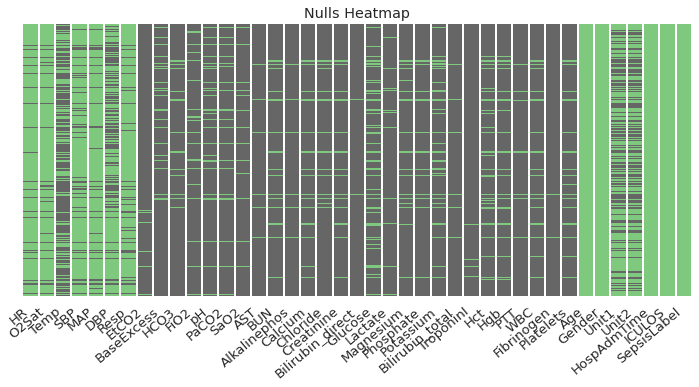

In [33]:
NBplot.plot_missing_value_heatmap(data)

In [34]:
data.drop(['EtCO2','SaO2', 'AST', 'Lactate', 'Phosphate', 'PTT'], axis=1, inplace=True)

In [37]:
statistics = data.describe()
statistics

HR         O2Sat  ...        ICULOS   SepsisLabel
count  1.059467e+06  1.017873e+06  ...  1.167202e+06  1.167202e+06
mean   8.471193e+01  9.721158e+01  ...  2.670151e+01  1.921347e-02
std    1.717271e+01  2.928238e+00  ...  2.777436e+01  1.372746e-01
min    2.000000e+01  2.000000e+01  ...  1.000000e+00  0.000000e+00
25%    7.200000e+01  9.600000e+01  ...  1.100000e+01  0.000000e+00
50%    8.400000e+01  9.800000e+01  ...  2.100000e+01  0.000000e+00
75%    9.600000e+01  9.950000e+01  ...  3.400000e+01  0.000000e+00
max    2.800000e+02  1.000000e+02  ...  3.360000e+02  1.000000e+00

[8 rows x 35 columns]

In [38]:
statistics.to_excel(path +'Statistics.xlsx')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167202 entries, 0 to 1167201
Data columns (total 35 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1059467 non-null  float64
 1   O2Sat             1017873 non-null  float64
 2   Temp              394625 non-null   float64
 3   SBP               993285 non-null   float64
 4   MAP               1029532 non-null  float64
 5   DBP               733099 non-null   float64
 6   Resp              1010036 non-null  float64
 7   BaseExcess        83331 non-null    float64
 8   HCO3              64410 non-null    float64
 9   FiO2              120467 non-null   float64
 10  pH                98926 non-null    float64
 11  PaCO2             77635 non-null    float64
 12  BUN               85097 non-null    float64
 13  Alkalinephos      18246 non-null    float64
 14  Calcium           64729 non-null    float64
 15  Chloride          68095 non-null    float64
 16  

In [40]:
#Lets check that all the features have a sufficient amount of data
for feat in data:
    print(f"in feature {feat} the num of unique values is: {data[feat].nunique()}")

in feature HR the num of unique values is: 339
in feature O2Sat the num of unique values is: 144
in feature Temp the num of unique values is: 626
in feature SBP the num of unique values is: 905
in feature MAP the num of unique values is: 940
in feature DBP the num of unique values is: 582
in feature Resp the num of unique values is: 220
in feature BaseExcess the num of unique values is: 347
in feature HCO3 the num of unique values is: 264
in feature FiO2 the num of unique values is: 101
in feature pH the num of unique values is: 102
in feature PaCO2 the num of unique values is: 452
in feature BUN the num of unique values is: 244
in feature Alkalinephos the num of unique values is: 692
in feature Calcium the num of unique values is: 464
in feature Chloride the num of unique values is: 106
in feature Creatinine the num of unique values is: 1200
in feature Bilirubin_direct the num of unique values is: 223
in feature Glucose the num of unique values is: 1050
in feature Magnesium the num of

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



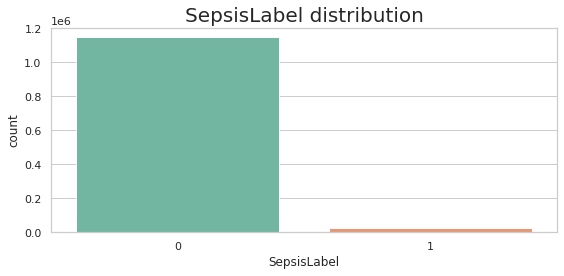

In [42]:
NBplot.count_plot(data,['SepsisLabel'])

In [43]:
data.SepsisLabel.value_counts()

0    1144776
1      22426
Name: SepsisLabel, dtype: int64

In [44]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Magnesium',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



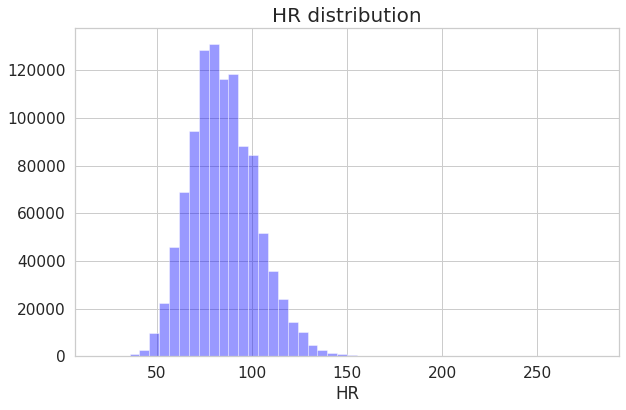

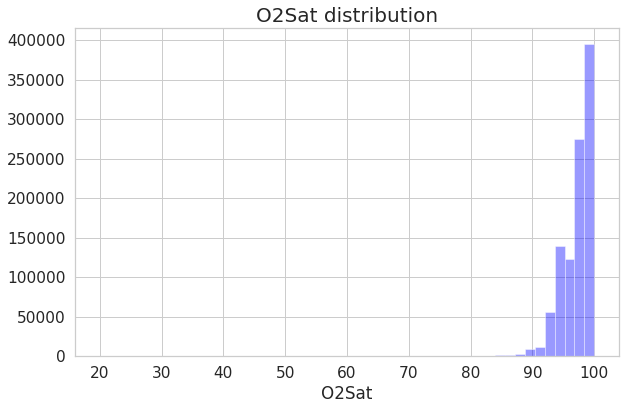

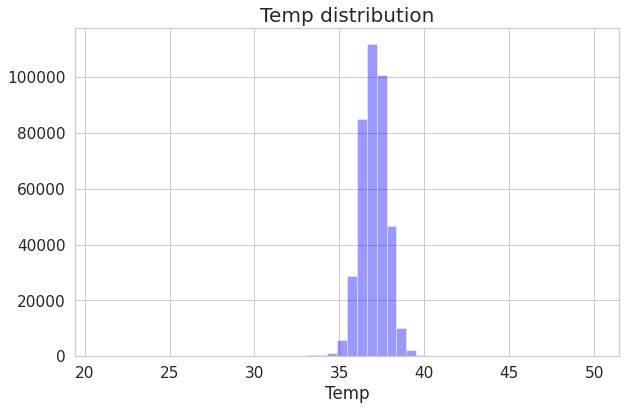

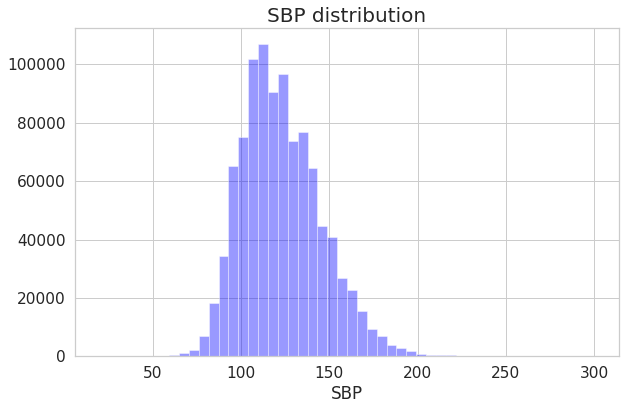

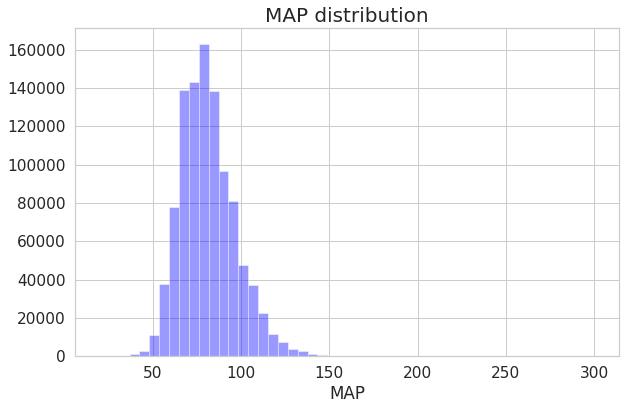

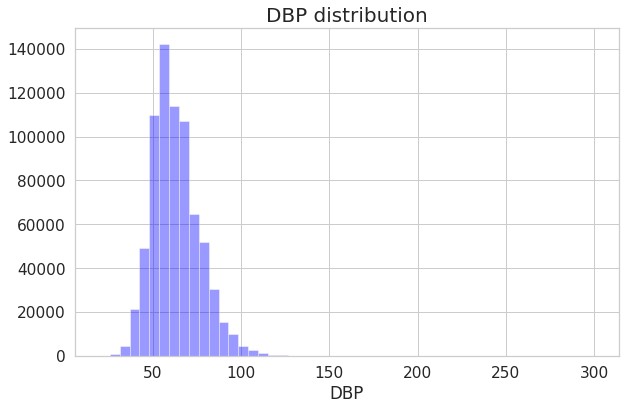

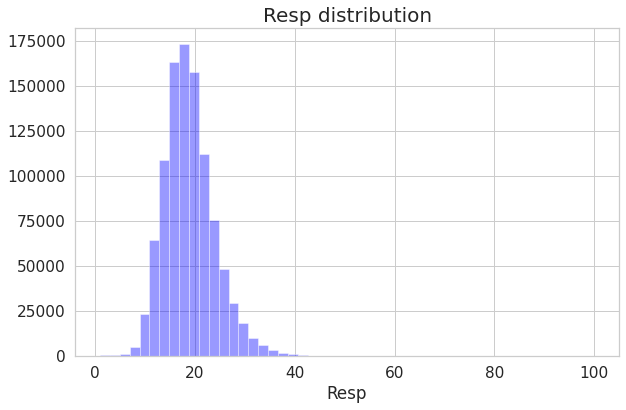

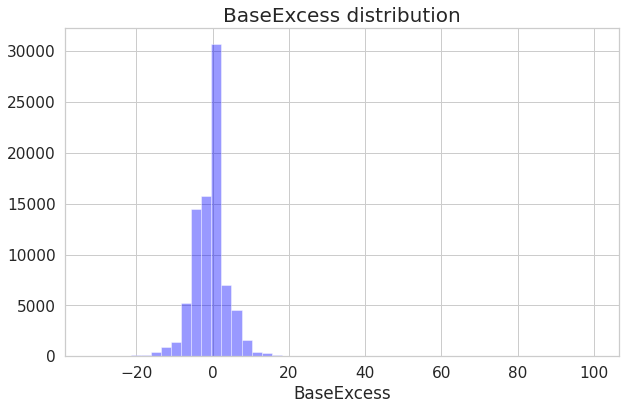

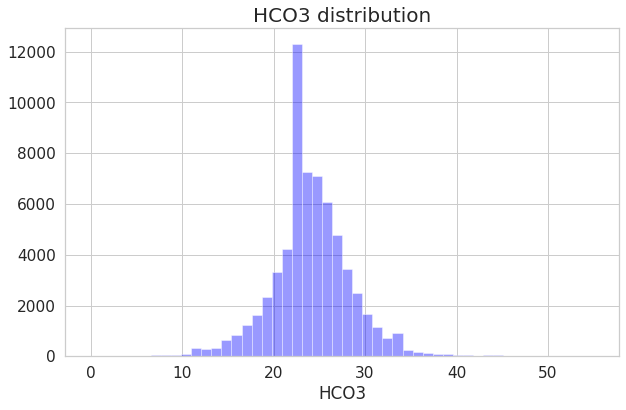

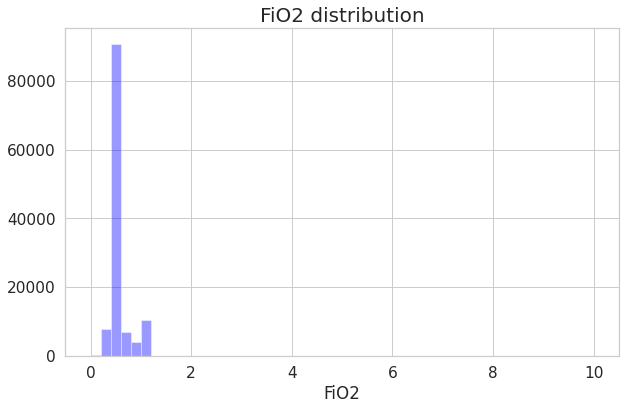

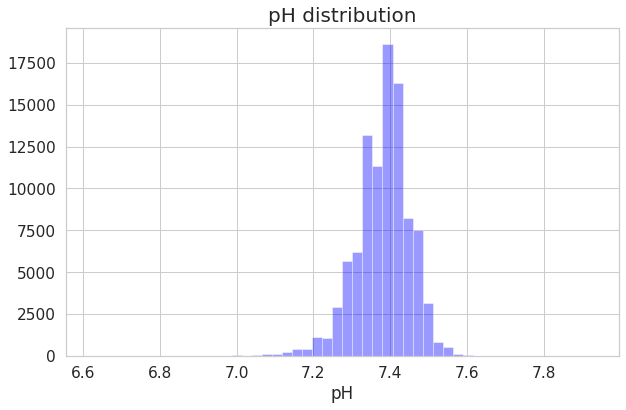

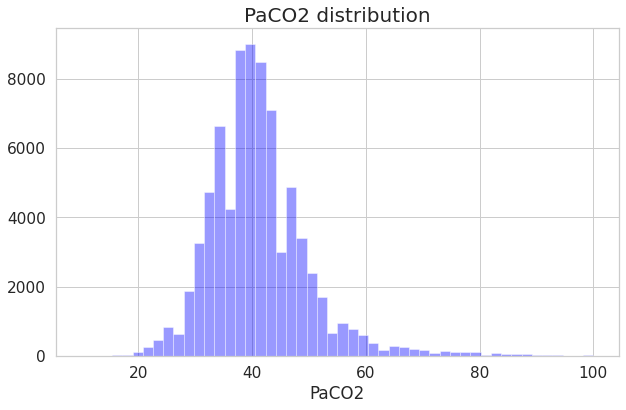

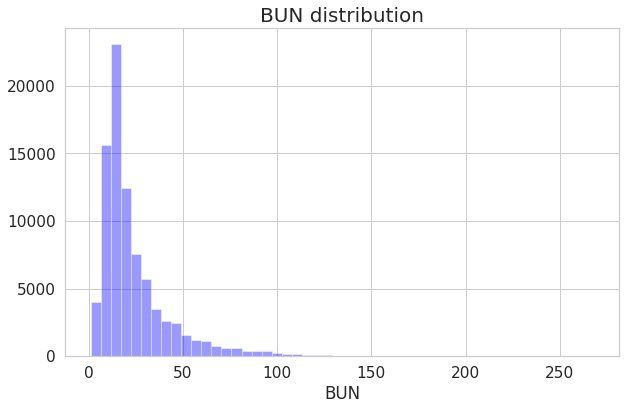

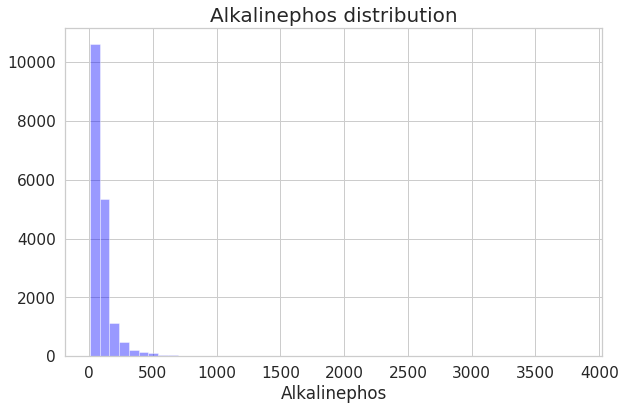

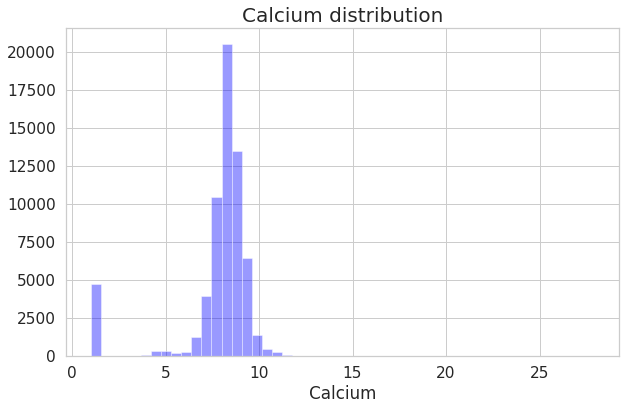

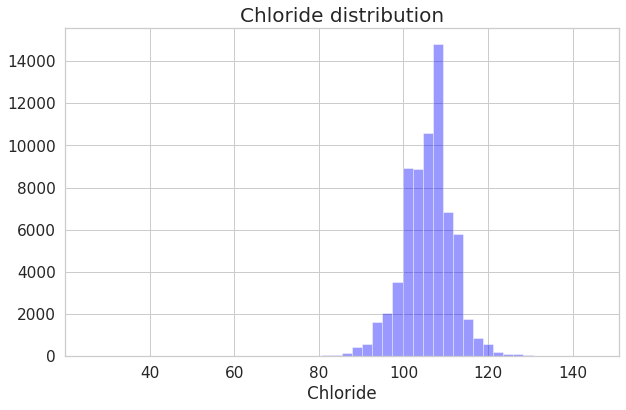

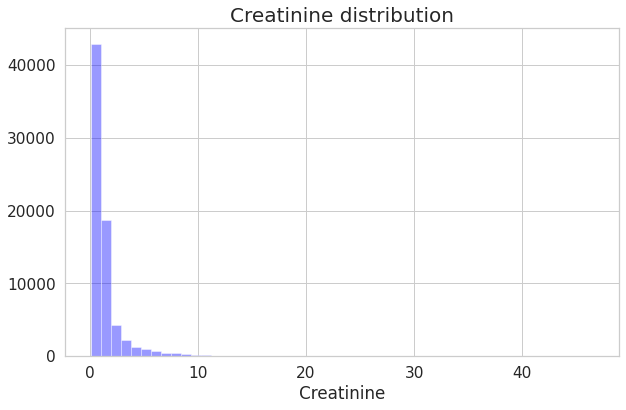

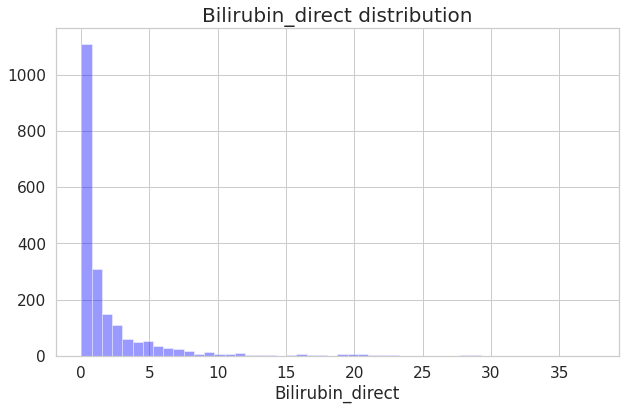

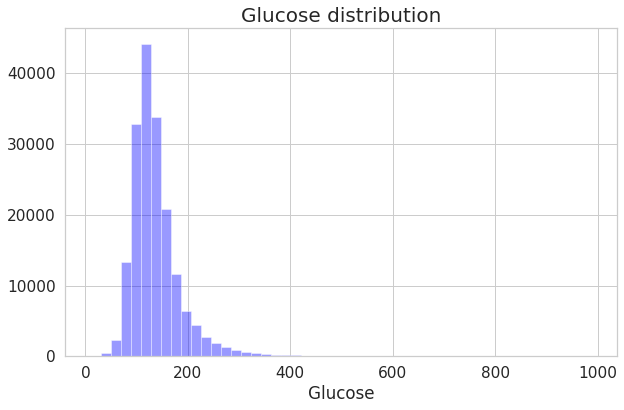

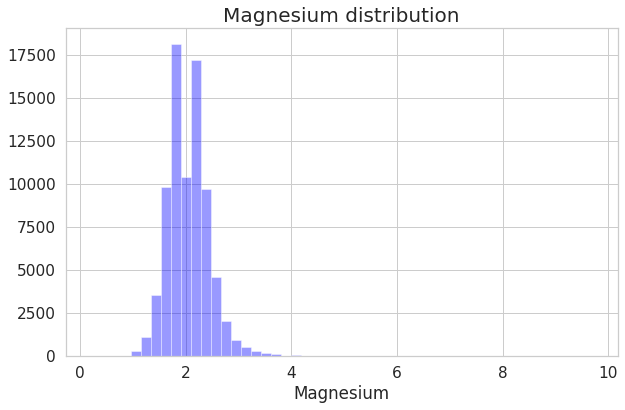

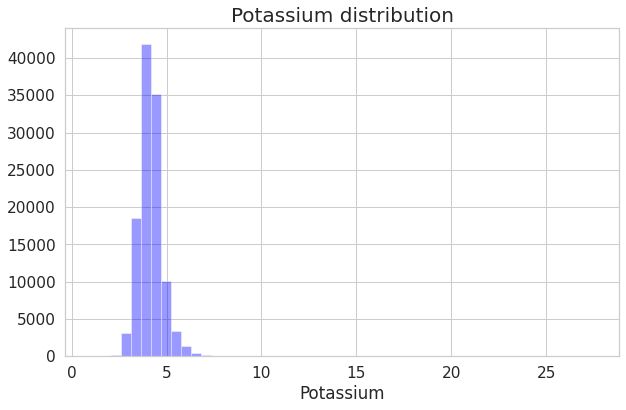

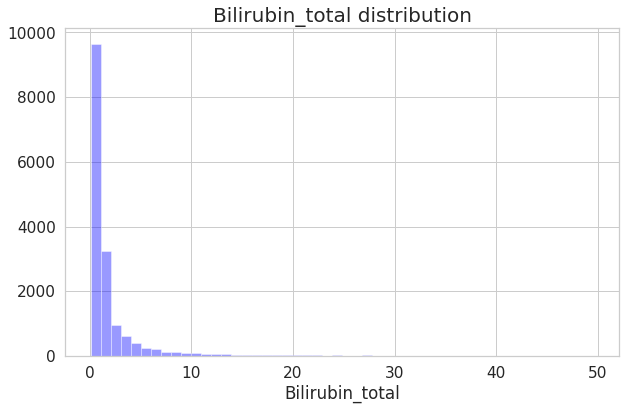

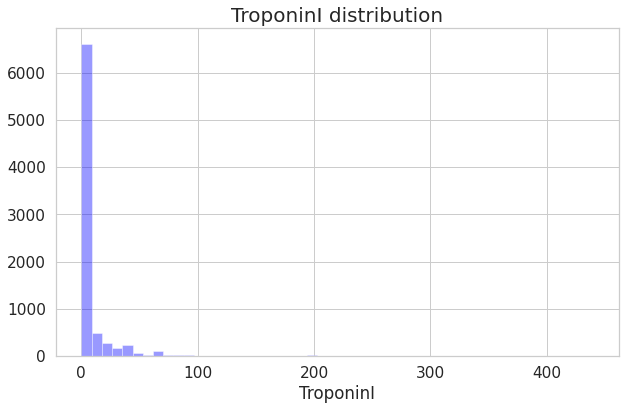

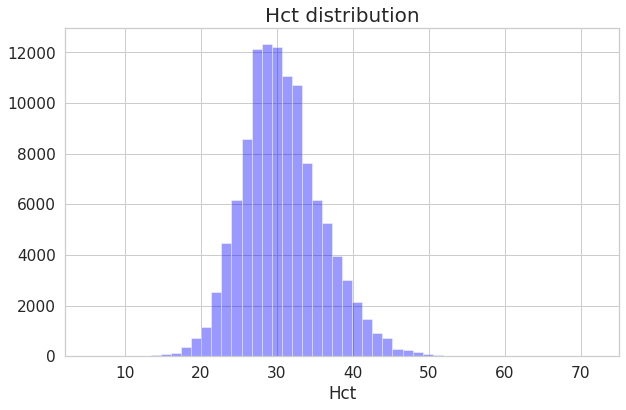

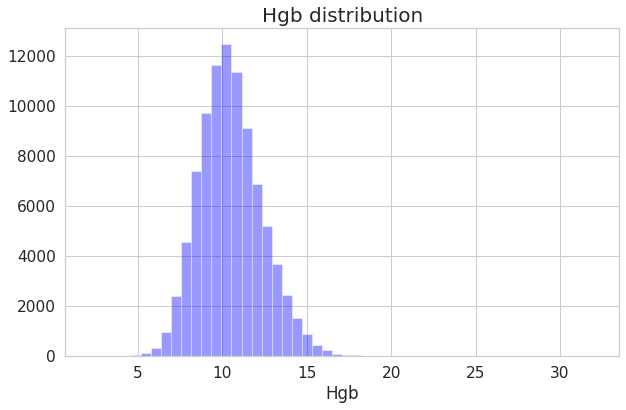

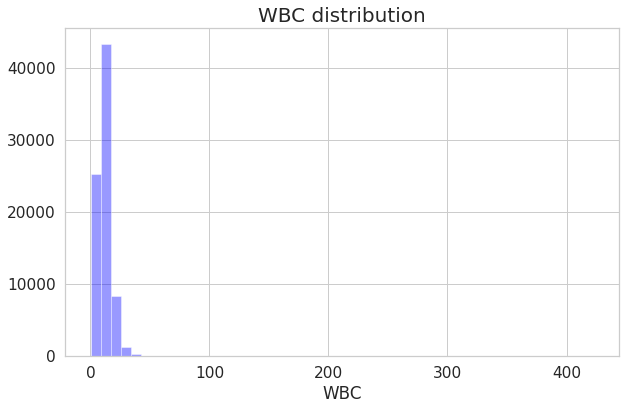

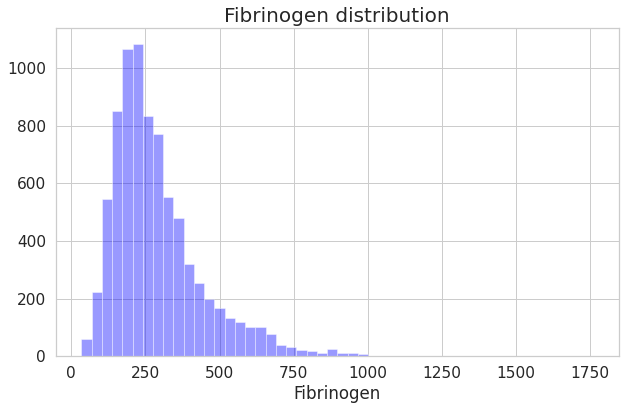

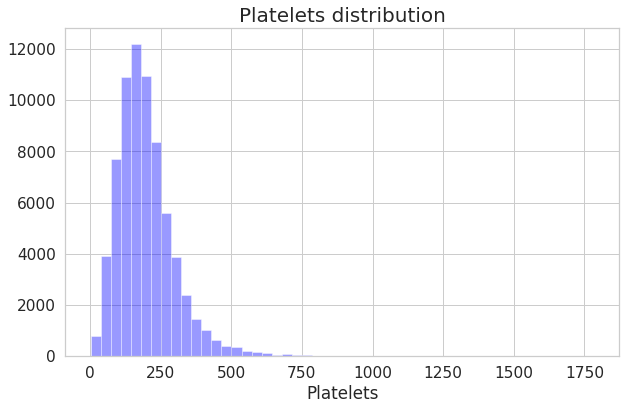

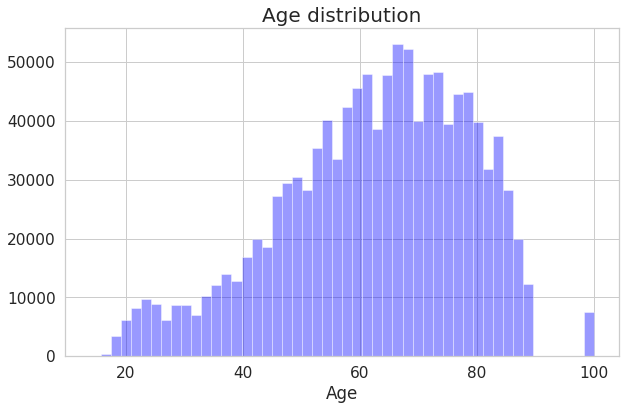

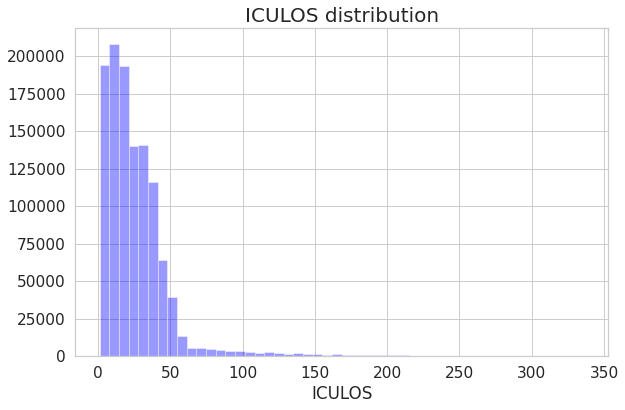

In [56]:
plot=NBplot.distribution_plot(data,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets', 'Age','ICULOS'])

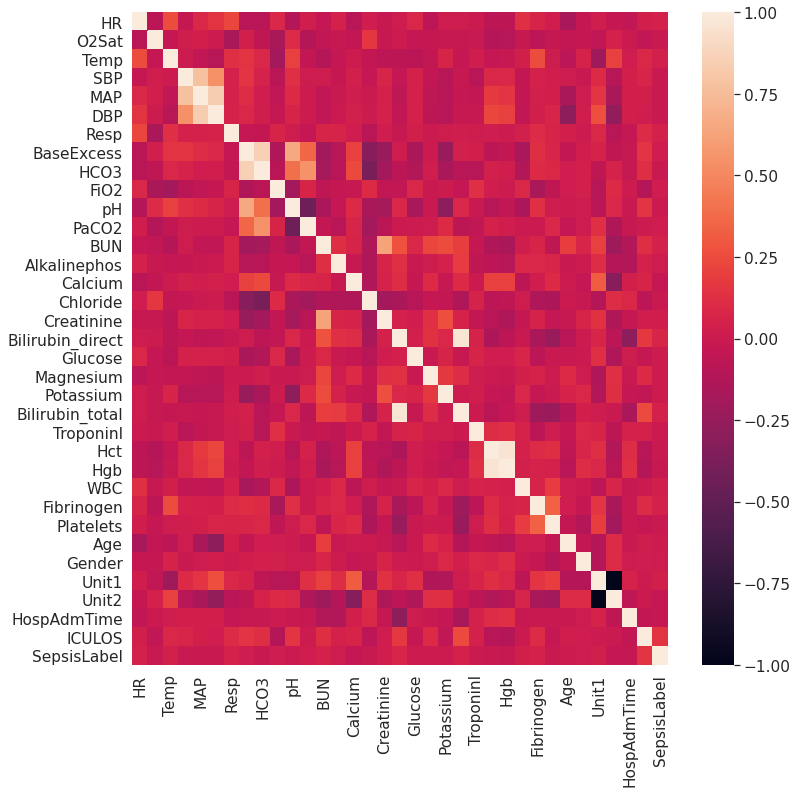

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [60]:
missing_features_count=data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].isnull().sum()
missing_features_count

HR                   107735
O2Sat                149329
Temp                 772577
SBP                  173917
MAP                  137670
DBP                  434103
Resp                 157166
BaseExcess          1083871
HCO3                1102792
FiO2                1046735
pH                  1068276
PaCO2               1089567
BUN                 1082105
Alkalinephos        1148956
Calcium             1102473
Chloride            1099107
Creatinine          1094076
Bilirubin_direct    1165131
Glucose              987695
Magnesium           1087792
Potassium           1052545
Bilirubin_total     1150776
TroponinI           1159014
Hct                 1052275
Hgb                 1075317
WBC                 1088216
Fibrinogen          1159063
Platelets           1095759
dtype: int64

In [61]:
missing_features_count.to_excel(path + 'missing_features_count.xlsx')

In [62]:
median_features = data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].median()
median_features

HR                   84.00
O2Sat                98.00
Temp                 37.00
SBP                 120.00
MAP                  79.00
DBP                  61.00
Resp                 18.00
BaseExcess            0.00
HCO3                 24.00
FiO2                  0.50
pH                    7.38
PaCO2                40.00
BUN                  17.00
Alkalinephos         75.00
Calcium               8.30
Chloride            106.00
Creatinine            0.90
Bilirubin_direct      0.60
Glucose             126.00
Magnesium             2.00
Potassium             4.10
Bilirubin_total       0.90
TroponinI             0.40
Hct                  30.30
Hgb                  10.40
WBC                  10.50
Fibrinogen          250.00
Platelets           181.00
dtype: float64

In [63]:
median_features.to_excel(path +'median_features.xlsx')

In [64]:
mean_features = data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].mean()
mean_features

HR                   84.711927
O2Sat                97.211582
Temp                 36.993541
SBP                 122.800077
MAP                  81.164234
DBP                  62.805455
Resp                 18.735828
BaseExcess           -0.670933
HCO3                 24.082455
FiO2                  0.525748
pH                    7.379360
PaCO2                41.107850
BUN                  24.057627
Alkalinephos        106.210457
Calcium               7.798669
Chloride            105.803414
Creatinine            1.471910
Bilirubin_direct      2.118576
Glucose             136.163727
Magnesium             2.046549
Potassium             4.144965
Bilirubin_total       2.253683
TroponinI             8.693322
Hct                  30.769380
Hgb                  10.499441
WBC                  11.600907
Fibrinogen          289.169419
Platelets           197.579493
dtype: float64

In [65]:
mean_features.to_excel(path +'mean_features.xlsx')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



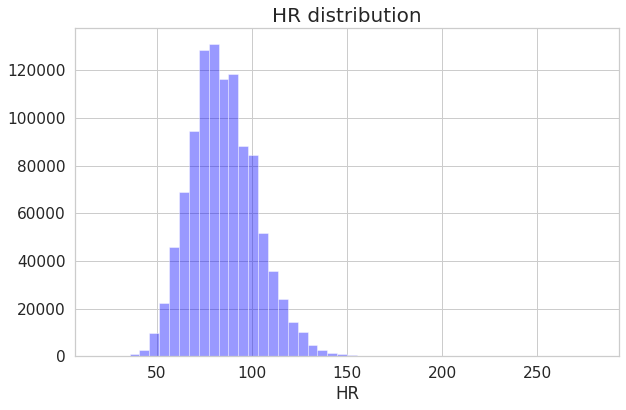

In [66]:
NBplot.distribution_plot(data,['HR'])

In [67]:
data.HR.fillna(data.HR.median(), inplace=True)
data.O2Sat.fillna(data.O2Sat.median(), inplace=True)
data.Temp.fillna(data.Temp.median(), inplace=True)
data.SBP.fillna(data.SBP.median(), inplace=True)
data.MAP.fillna(data.MAP.median(), inplace=True)
data.DBP.fillna(data.DBP.median(), inplace=True)
data.Resp.fillna(data.Resp.median(), inplace=True)
data.BaseExcess.fillna(data.BaseExcess.median(), inplace=True)
data.HCO3.fillna(data.HCO3.median(), inplace=True)
data.FiO2.fillna(data.FiO2.median(), inplace=True)
data.pH.fillna(data.pH.median(), inplace=True)
data.PaCO2.fillna(data.PaCO2.median(), inplace=True)
data.Calcium.fillna(data.Calcium.median(), inplace=True)
data.Chloride.fillna(data.Chloride.median(), inplace=True)
data.Creatinine.fillna(data.Creatinine.median(), inplace=True)
data.Magnesium.fillna(data.Magnesium.median(), inplace=True)
data.Potassium.fillna(data.Potassium.median(), inplace=True)
data.Hct.fillna(data.Hct.median(), inplace=True)
data.Hgb.fillna(data.Hgb.median(), inplace=True)
data.WBC.fillna(data.WBC.median(), inplace=True)
data.BUN.fillna(data.BUN.mean(), inplace=True)
data.Alkalinephos.fillna(data.Alkalinephos.mean(), inplace=True)
data.Bilirubin_direct.fillna(data.Bilirubin_direct.mean(), inplace=True)
data.Glucose.fillna(data.Glucose.mean(), inplace=True)
data.Bilirubin_total.fillna(data.Bilirubin_total.mean(), inplace=True)
data.TroponinI.fillna(data.TroponinI.mean(), inplace=True)
data.Fibrinogen.fillna(data.Fibrinogen.mean(), inplace=True)
data.Platelets.fillna(data.Platelets.mean(), inplace=True)

In [68]:
data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Magnesium           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
WBC                 0
Fibrinogen          0
Platelets           0
dtype: int64

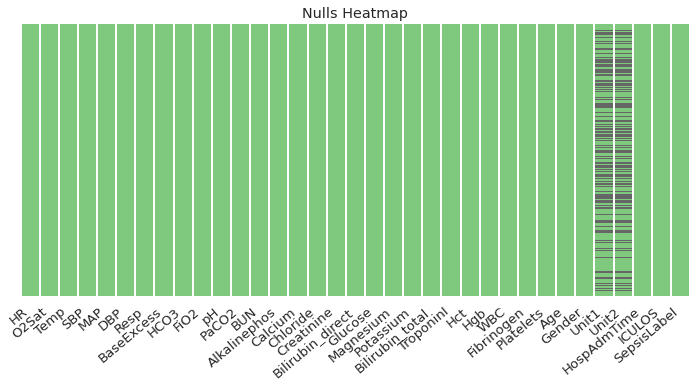

In [69]:
NBplot.plot_missing_value_heatmap(data)

In [70]:
data.drop(['Unit1', 'Unit2'], axis=1, inplace=True)

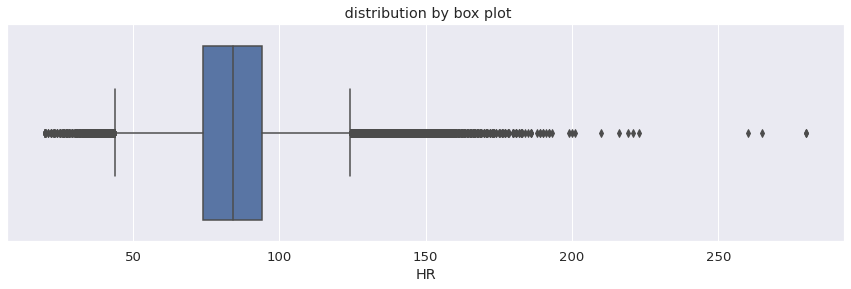

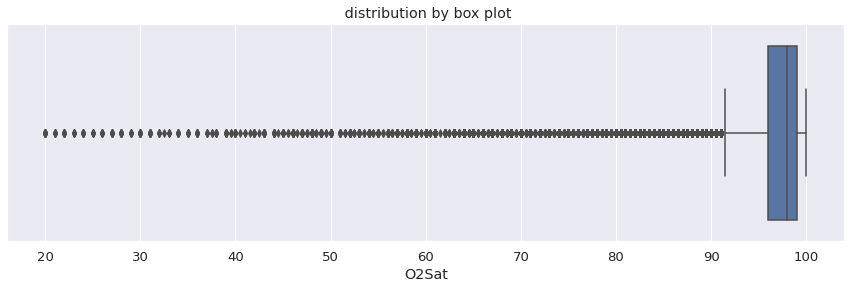

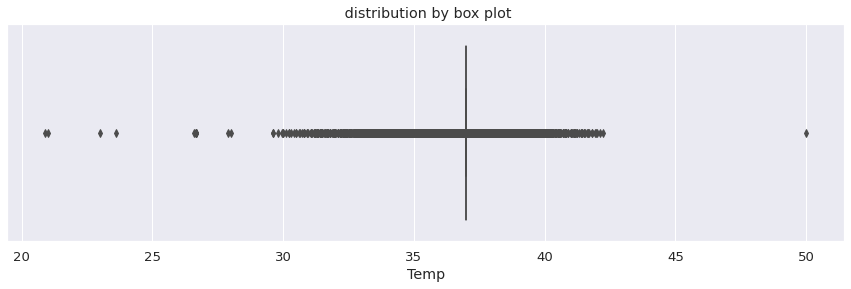

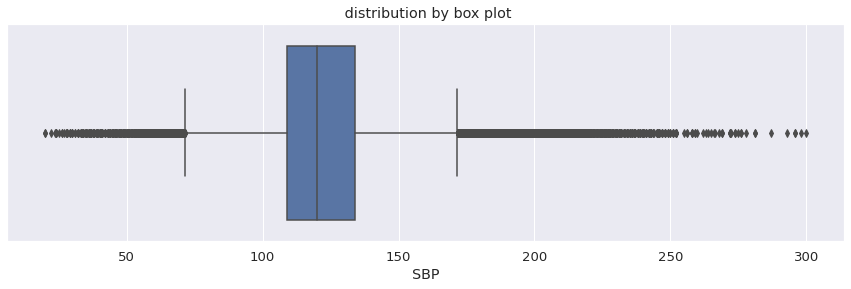

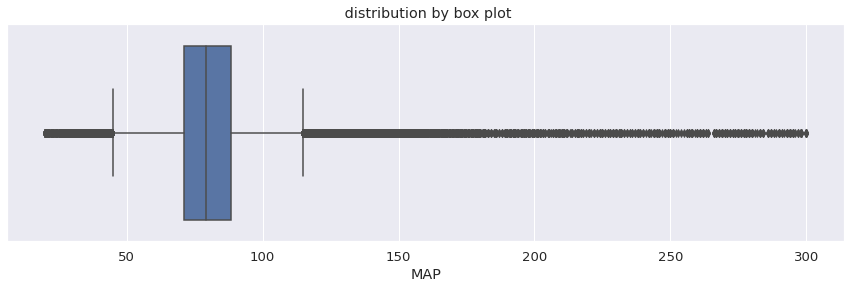

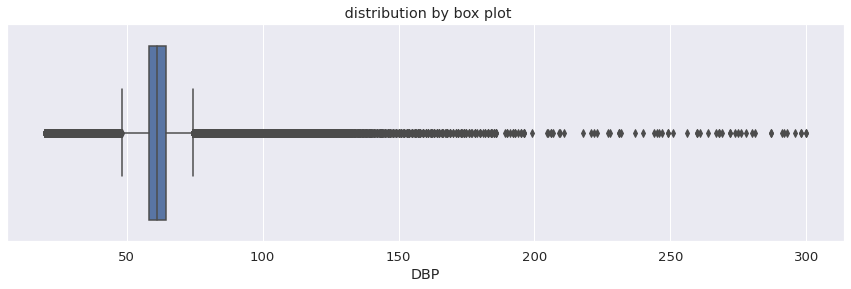

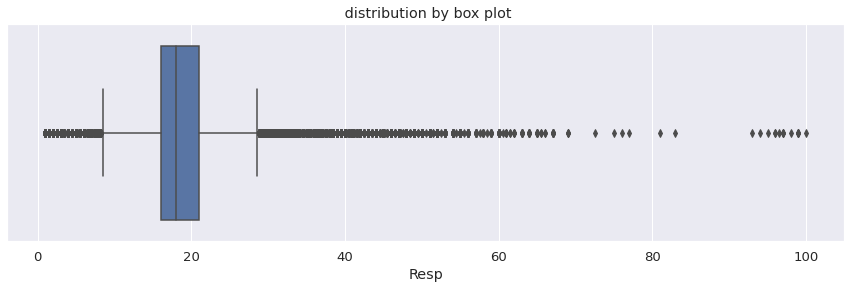

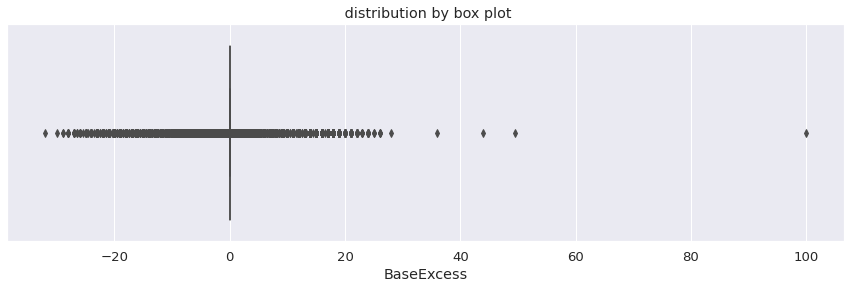

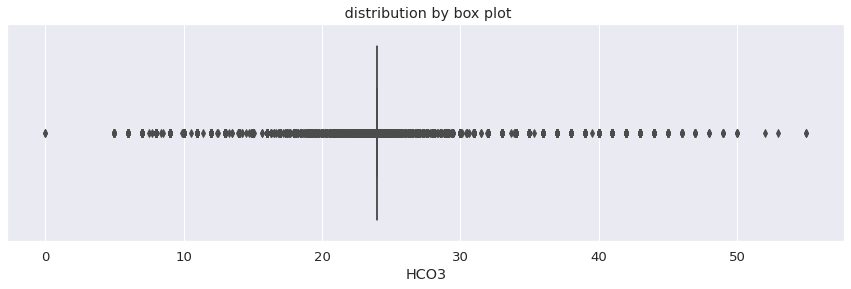

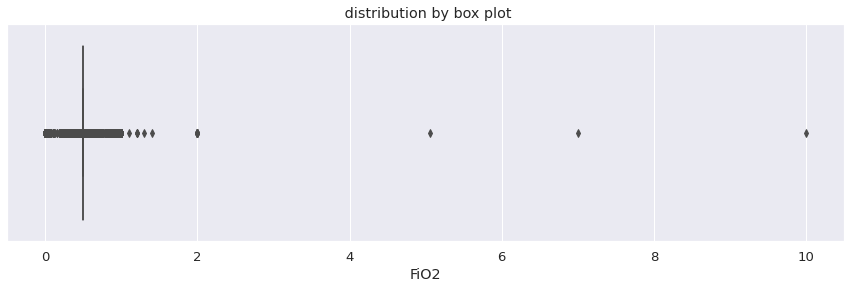

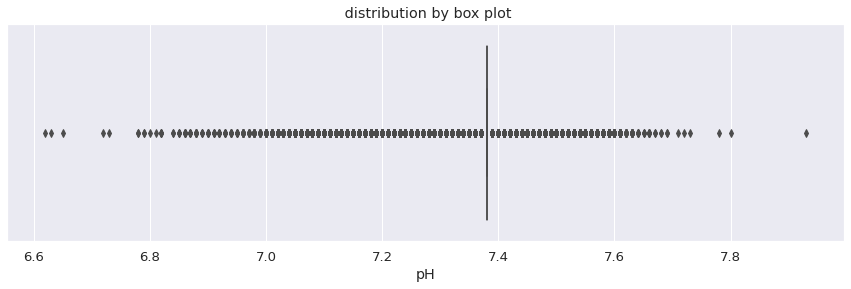

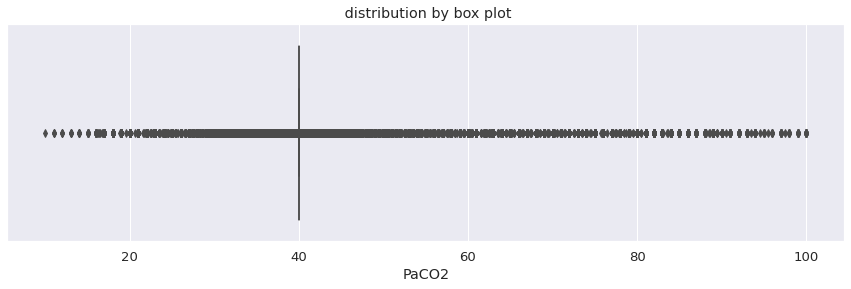

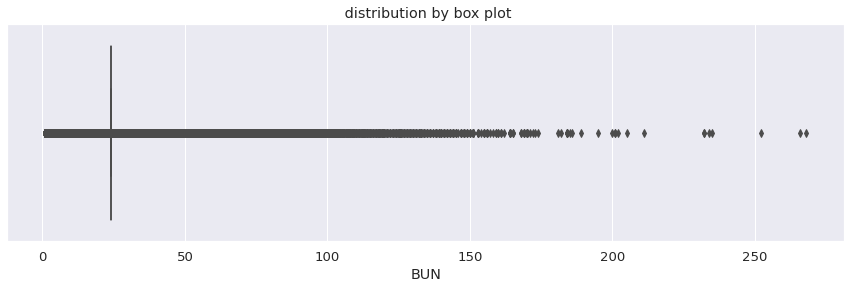

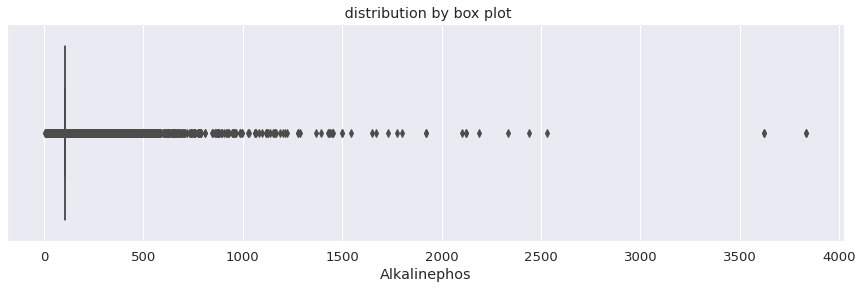

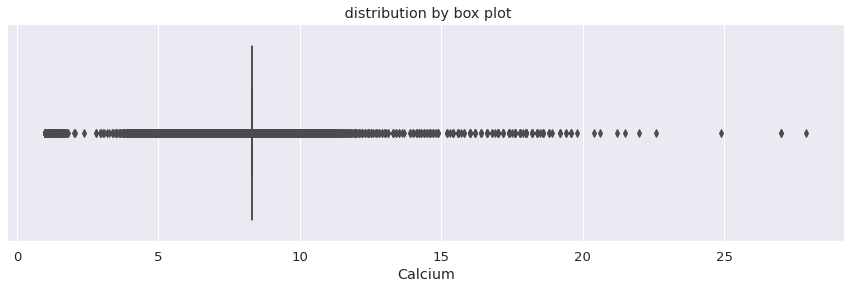

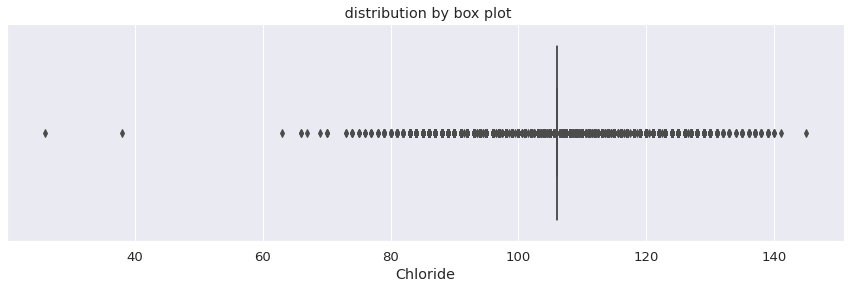

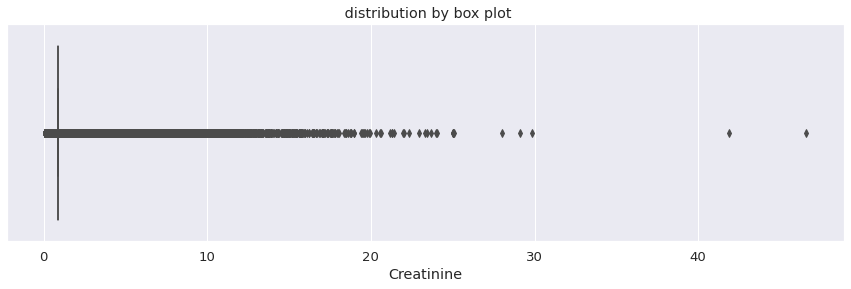

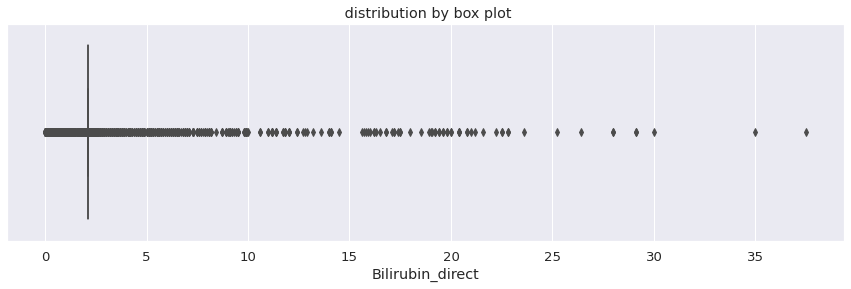

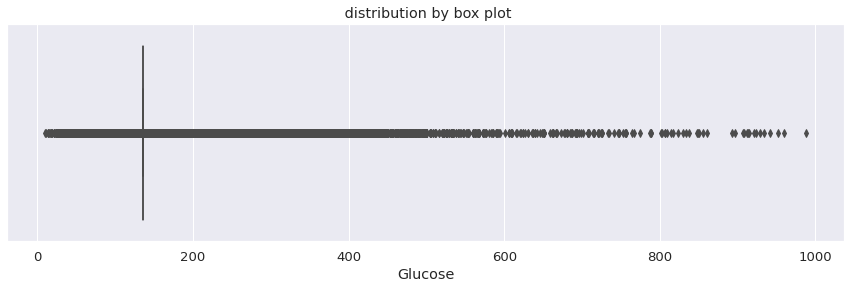

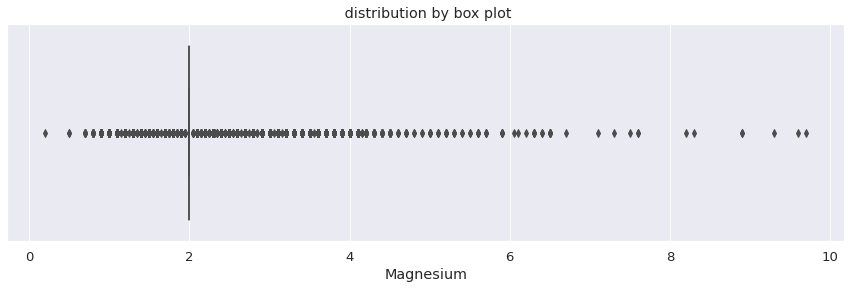

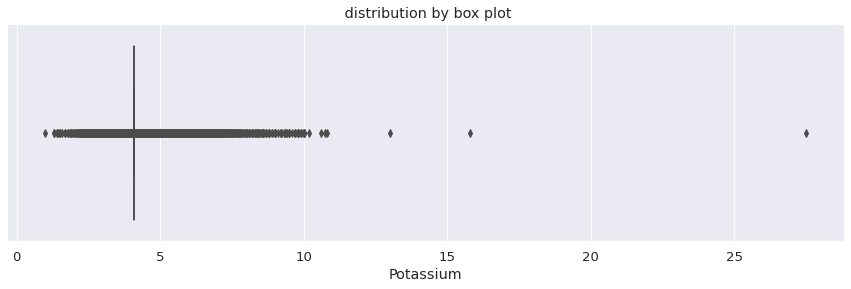

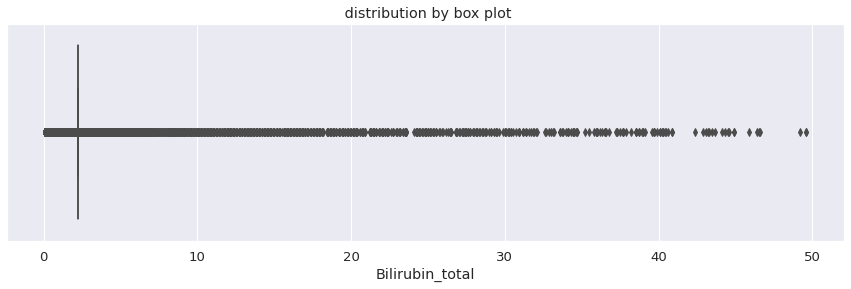

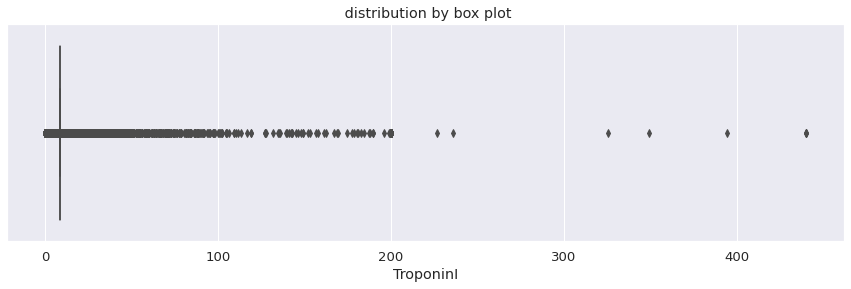

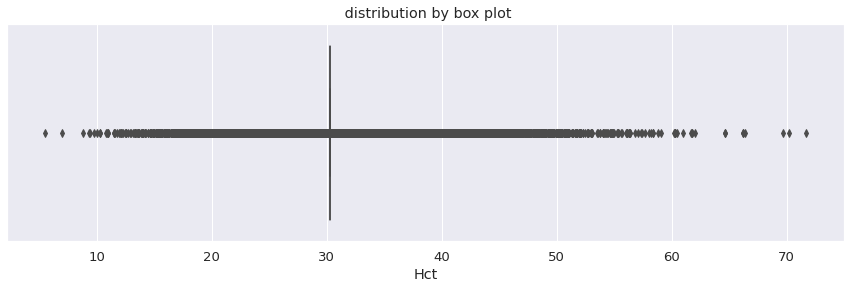

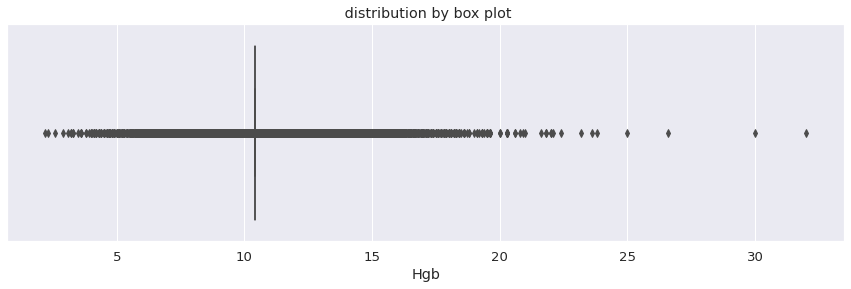

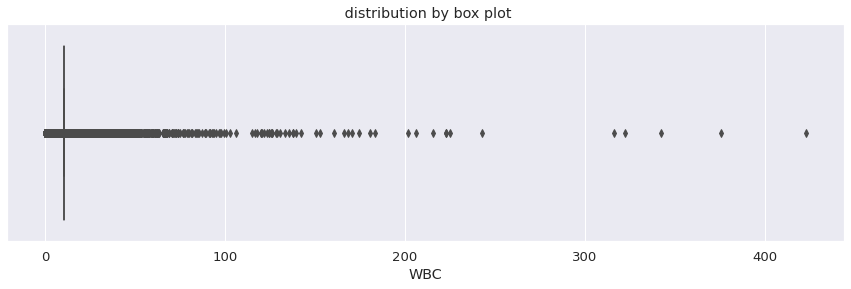

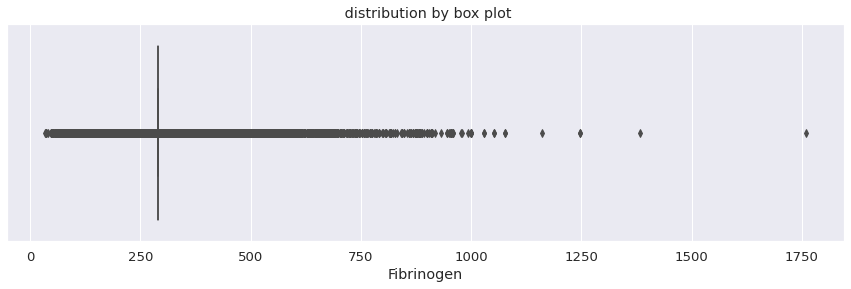

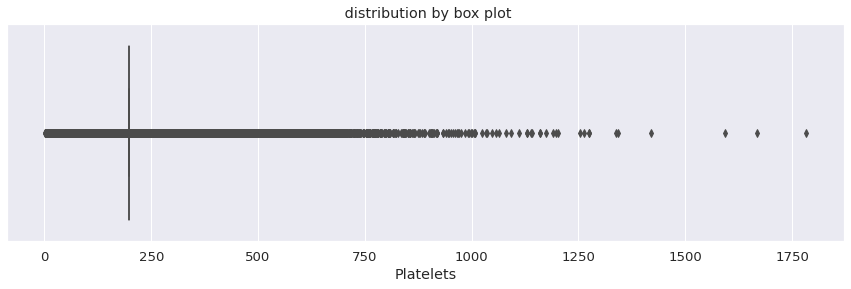

In [71]:
for col in ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']:
    plt.figure(figsize=(15,4))
    g = sns.boxplot(x=data[col])
    g.set(title=" distribution by box plot")
    plt.show()

In [74]:
print(data['HR'].quantile(0.10))
print(data['HR'].quantile(0.90))

64.0
106.0


In [75]:
data["HR"] = np.where(data["HR"] <64.0, 64.0,data['HR'])
data["HR"] = np.where(data["HR"] >106.0, 106.0,data['HR'])
print(data['HR'].skew())

0.11937562504819832


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



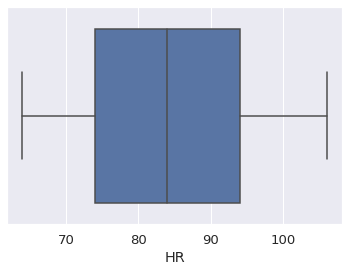

In [76]:
sns.boxplot(data['HR'])

In [77]:
print(data['O2Sat'].quantile(0.10))
print(data['O2Sat'].quantile(0.90))

94.0
100.0


In [79]:
data["O2Sat"] = np.where(data["O2Sat"] <94.0, 94.0,data['O2Sat'])
data["O2Sat"] = np.where(data["O2Sat"] >100.0, 100.0,data['O2Sat'])
print(data['O2Sat'].skew())

-0.42423894390159966


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



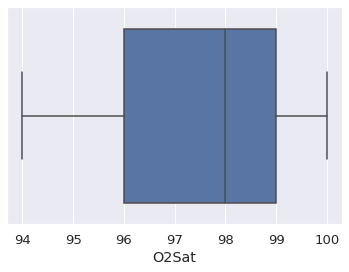

In [80]:
sns.boxplot(data['O2Sat'])

In [81]:
print(data['SBP'].quantile(0.10))
print(data['SBP'].quantile(0.90))

97.5
151.0


In [82]:
data["SBP"] = np.where(data["SBP"] <97.5, 97.5,data['SBP'])
data["SBP"] = np.where(data["SBP"] >151.0, 151.0,data['SBP'])
print(data['SBP'].skew())

0.29824444509557896


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



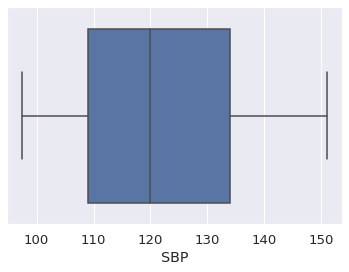

In [84]:
sns.boxplot(data['SBP'])

In [85]:
print(data['Temp'].quantile(0.25))
print(data['Temp'].quantile(0.75))

37.0
37.0


In [88]:
data["Temp"] = np.where(data["Temp"] <37.0, 37.0,data['Temp'])
data["Temp"] = np.where(data["Temp"] >37.0, 37.0,data['Temp'])
print(data['Temp'].skew())

0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



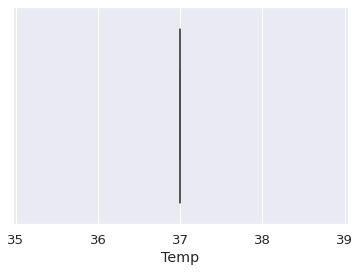

In [89]:
sns.boxplot(data['Temp'])

In [90]:
print(data['MAP'].quantile(0.10))
print(data['MAP'].quantile(0.90))

64.0
100.33


In [97]:
data["MAP"] = np.where(data["MAP"] <64.0, 64.0,data['MAP'])
data["MAP"] = np.where(data["MAP"] >97.0, 97.0,data['MAP'])
print(data['MAP'].skew())

0.1655555351229807


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



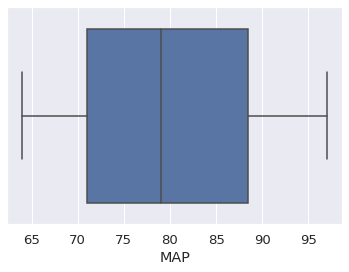

In [98]:
sns.boxplot(data['MAP'])

In [99]:
print(data['DBP'].quantile(0.10))
print(data['DBP'].quantile(0.90))

50.0
76.0


In [100]:
data["DBP"] = np.where(data["DBP"] <50.0, 50.0,data['DBP'])
data["DBP"] = np.where(data["DBP"] >74.0, 74.0,data['DBP'])
print(data['DBP'].skew())

0.23906976006734632


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



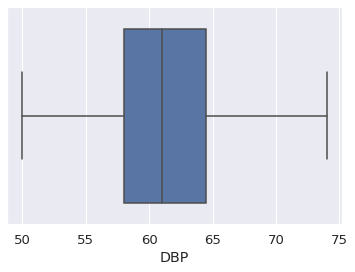

In [101]:
sns.boxplot(data['DBP'])

In [102]:
print(data['Resp'].quantile(0.10))
print(data['Resp'].quantile(0.90))

13.0
25.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



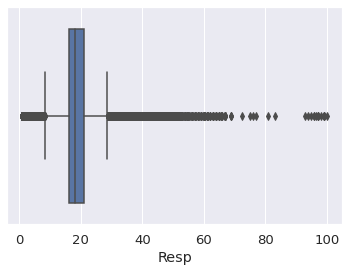

In [103]:
sns.boxplot(data['Resp'])

In [104]:
data["Resp"] = np.where(data["Resp"] <13.0, 13.0,data['Resp'])
data["Resp"] = np.where(data["Resp"] >25.0, 25.0,data['Resp'])
print(data['Resp'].skew())

0.29515565605218047


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



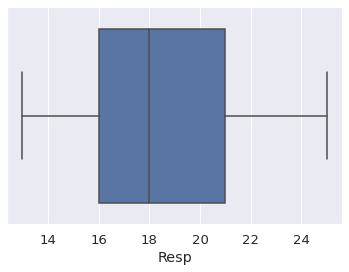

In [105]:
sns.boxplot(data['Resp'])

In [106]:
print(data['BaseExcess'].quantile(0.10))
print(data['BaseExcess'].quantile(0.90))

0.0
0.0


In [107]:
data["BaseExcess"] = np.where(data["BaseExcess"] <0.0, 0.0,data['BaseExcess'])
data["BaseExcess"] = np.where(data["BaseExcess"] >0.0, 0.0,data['BaseExcess'])
print(data['BaseExcess'].skew())

0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



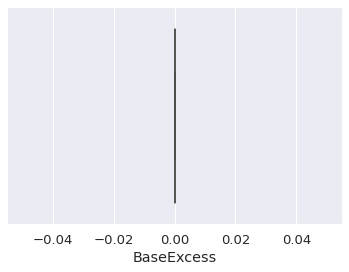

In [108]:
sns.boxplot(data['BaseExcess'])

In [109]:
print(data['HCO3'].quantile(0.10))
print(data['HCO3'].quantile(0.90))

24.0
24.0


In [110]:
data["HCO3"] = np.where(data["HCO3"] <24.0, 24.0,data['HCO3'])
data["HCO3"] = np.where(data["HCO3"] >24.0, 24.0,data['HCO3'])
print(data['HCO3'].skew())

0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



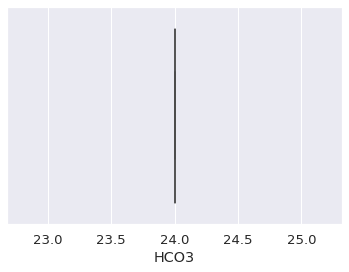

In [111]:
sns.boxplot(data['HCO3'])

In [112]:
print(data['FiO2'].quantile(0.25))
print(data['FiO2'].quantile(0.75))

0.5
0.5


In [113]:
data["FiO2"] = np.where(data["FiO2"] <0.5, 0.5,data['FiO2'])
data["FiO2"] = np.where(data["FiO2"] >0.5, 0.5,data['FiO2'])
print(data['FiO2'].skew())

0


In [114]:
print(data['pH'].quantile(0.25))
print(data['pH'].quantile(0.75))

7.38
7.38


In [115]:
data["pH"] = np.where(data["pH"] <0.5, 0.5,data['pH'])
data["pH"] = np.where(data["pH"] >0.5, 0.5,data['pH'])
print(data['pH'].skew())

0


In [116]:
print(data['PaCO2'].quantile(0.25))
print(data['PaCO2'].quantile(0.75))

40.0
40.0


In [117]:
data["PaCO2"] = np.where(data["PaCO2"] <40.0, 40.0,data['PaCO2'])
data["PaCO2"] = np.where(data["PaCO2"] >40.0, 40.0,data['PaCO2'])
print(data['PaCO2'].skew())

0


In [118]:
print(data['BUN'].quantile(0.25))
print(data['BUN'].quantile(0.75))

24.057627178396416
24.057627178396416


In [120]:
data["BUN"] = np.where(data["BUN"] <24.058790207899964, 24.058790207899964,data['BUN'])
data["BUN"] = np.where(data["BUN"] >24.058790207899964, 24.058790207899964,data['BUN'])
print(data['BUN'].skew())

0


In [121]:
data_cvs_resp = data[['HR','O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Age','Gender', 'SepsisLabel']]

In [122]:
data_cvs_resp.to_csv(path + 'data_cvs_resp.csv')

In [68]:
data_cvs_resp.head()

HR  O2Sat    SBP   MAP   DBP  Resp    Age  Gender  SepsisLabel
0   99.0  100.0  120.0  71.0  61.0  13.5  69.66       0            0
1   97.5  100.0  120.0  79.0  61.0  15.0  69.66       0            0
2   96.0  100.0  120.0  70.0  61.0  13.0  69.66       0            0
3  100.0   99.0  120.0  75.0  61.0  14.0  69.66       0            0
4  102.0  100.0  120.0  74.0  61.0  17.0  69.66       0            0

In [69]:
data_cvs_resp.columns

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'SepsisLabel'],
      dtype='object')

In [70]:
from pandas_profiling import ProfileReport

In [71]:
profile =ProfileReport (data_cvs_resp, title = 'CVS_Resp dataset', html ={'style':{'full_width': True}})

In [72]:
profile.to_notebook_iframe()

In [73]:
profile.to_file(output_file='CVS_resp.html')

In [74]:
data_cvs_resp.groupby('SepsisLabel').size()

SepsisLabel
0    1144057
1      22426
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



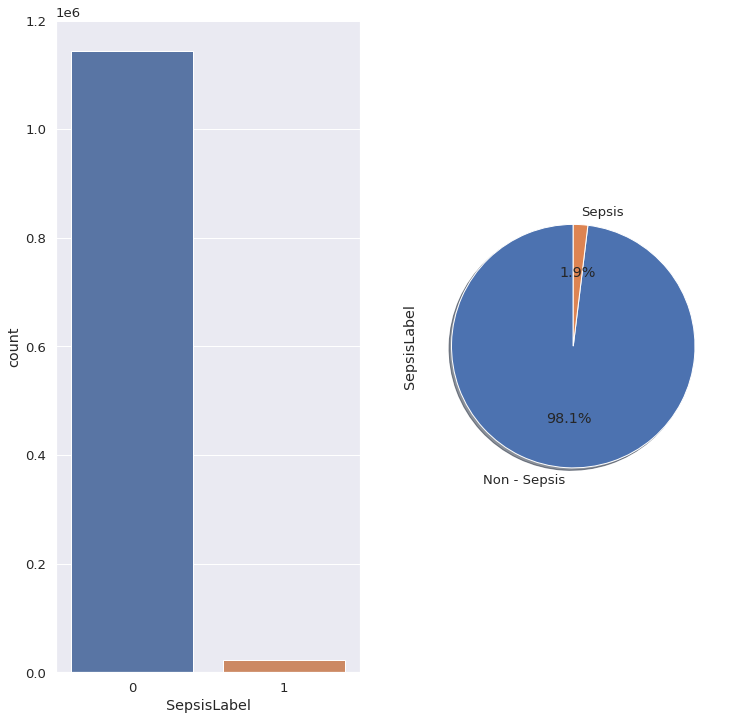

In [75]:
fig1, ax1 = plt.subplots(1,2, figsize =(12,12))
sns.countplot(data_cvs_resp['SepsisLabel'],ax=ax1[0])
labels = 'Non - Sepsis', 'Sepsis'
data_cvs_resp.SepsisLabel.value_counts().plot.pie(labels=labels, autopct ='%1.1f%%', shadow=True, startangle =90)

In [ ]:
#sns.pairplot(data_cvs_resp, hue='SepsisLabel')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f05564a29d8> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f05561c7f28> (for post_execute):


KeyboardInterrupt: ignored

In [76]:
cor = data_cvs_resp.corr()
cor

HR     O2Sat       SBP  ...       Age    Gender  SepsisLabel
HR           1.000000 -0.068342 -0.026573  ... -0.155876 -0.025361     0.042771
O2Sat       -0.068342  1.000000  0.012014  ... -0.053999 -0.044503    -0.004981
SBP         -0.026573  0.012014  1.000000  ...  0.019671 -0.007969    -0.010065
MAP          0.084828  0.023330  0.757384  ... -0.147424  0.010884    -0.014317
DBP          0.115483  0.003086  0.452648  ... -0.221749  0.021056    -0.010504
Resp         0.215091 -0.160713  0.052157  ...  0.044536  0.006908     0.040265
Age         -0.155876 -0.053999  0.019671  ...  1.000000 -0.044102     0.000768
Gender      -0.025361 -0.044503 -0.007969  ... -0.044102  1.000000     0.008756
SepsisLabel  0.042771 -0.004981 -0.010065  ...  0.000768  0.008756     1.000000

[9 rows x 9 columns]

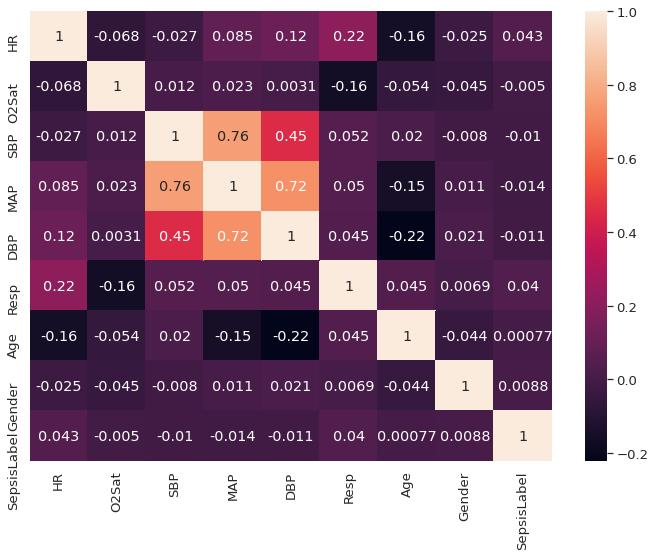

In [77]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(cor, annot=True)

In [78]:
pd.crosstab(data_cvs_resp['HR'], data_cvs_resp['SepsisLabel'])

SepsisLabel       0     1
HR                       
64.0         118519  1608
64.5            682     5
65.0          12663   159
65.5            800     5
66.0          15357   192
...             ...   ...
104.0         11211   301
104.5           655    19
105.0          9290   277
105.5           627    18
106.0        119293  4449

[92 rows x 2 columns]

In [79]:
#df = data_cvs_resp.sample(n=20000, replace=False,random_state=1)
#fig,ax2 = plt.subplots(3,2, figsize = (12,8))
#sns.boxplot(x='SepsisLabel', y= 'HR', data = df, ax = ax2[0][0])
#sns.barplot(x='SepsisLabel', y= 'HR', data = df, ax = ax2[0][1])
#sns.stripplot(x='SepsisLabel', y= 'HR', data = df,jitter=True, ax = ax2[1][0])
#sns.swarmplot(x='SepsisLabel', y= 'HR', data = df, ax = ax2[1][1])
#sns.violinplot(x='SepsisLabel', y= 'HR', data = df, ax = ax2[2][0])
#sns.countplot(x='SepsisLabel', y= 'HR', data = df, ax = ax2[2][1])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f4de3e70f28> (for post_execute):


KeyboardInterrupt: ignored

In [80]:
X = data_cvs_resp.drop('SepsisLabel', axis=1)
y = data_cvs_resp.SepsisLabel

In [81]:
#Train-Test split using stratified random sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=4)

In [97]:
from sklearn.preprocessing import StandardScaler

#Standardize the data - Feature Scaling
sc_a = StandardScaler()
X_train = sc_a.fit_transform(X_train)
X_test = sc_a.transform(X_test)

In [98]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
sepsis_model = GaussianNB()

sepsis_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
sepsis_train_predict = sepsis_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, sepsis_train_predict)))
print()

Model Accuracy: 0.9808



In [100]:
sepsis_test_predict = sepsis_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, sepsis_test_predict)))
print()

Model Accuracy: 0.9808



In [101]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, sepsis_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, sepsis_test_predict, labels=[1, 0]))

Confusion Matrix
[[     0   6728]
 [     0 343217]]

Classification Report


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6728
           0       0.98      1.00      0.99    343217

    accuracy                           0.98    349945
   macro avg       0.49      0.50      0.50    349945
weighted avg       0.96      0.98      0.97    349945



In [102]:
from sklearn.ensemble import RandomForestClassifier
sepsis_rf_model = RandomForestClassifier(random_state=52)
sepsis_rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [103]:
rf_train_predict = sepsis_rf_model.predict(X_train)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, rf_train_predict)))

Model Accuracy: 1.00


In [104]:
rf_test_predict = sepsis_rf_model.predict(X_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, rf_test_predict)))

Model Accuracy: 0.98


In [105]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[   147   6581]
 [   157 343060]]

Classification Report
              precision    recall  f1-score   support

           1       0.48      0.02      0.04      6728
           0       0.98      1.00      0.99    343217

    accuracy                           0.98    349945
   macro avg       0.73      0.51      0.52    349945
weighted avg       0.97      0.98      0.97    349945



In [106]:
from sklearn.linear_model import LogisticRegression

sepsis_lr_model = LogisticRegression(C=0.7, random_state=52)
sepsis_lr_model.fit(X_train, y_train.ravel())
lr_test_predict = sepsis_lr_model.predict(X_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.98

Confusion Matrix
[[     0   6728]
 [     0 343217]]

Classification Report


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6728
           0       0.98      1.00      0.99    343217

    accuracy                           0.98    349945
   macro avg       0.49      0.50      0.50    349945
weighted avg       0.96      0.98      0.97    349945



In [107]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [108]:
from sklearn import model_selection